In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats

from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal
from statsmodels.api import qqplot, stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from math import log

In [2]:
cars = pd.read_csv('cars.csv')

In [3]:
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [4]:
cars.shape

(38531, 30)

In [5]:
cars.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [7]:
cars.describe(include='object')

,manufacturer_name,model_name,transmission,color,engine_fuel,engine_type,body_type,state,drivetrain,location_region
count,38531,38531,38531,38531,38531,38531,38531,38531,38531,38531
unique,55,1118,2,12,6,3,12,3,3,6
top,Volkswagen,Passat,mechanical,black,gasoline,gasoline,sedan,owned,front,Минская обл.
freq,4243,1423,25633,7705,24065,25647,13011,37723,27746,24230


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


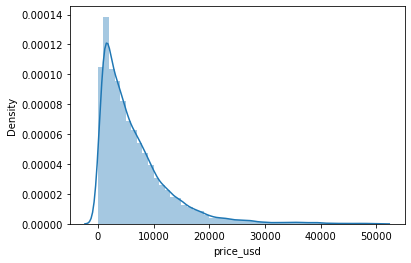

In [8]:
sns.distplot(cars['price_usd'])
plt.show()

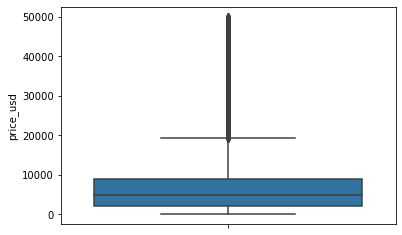

In [9]:
sns.boxplot(y=cars['price_usd'])
plt.show()

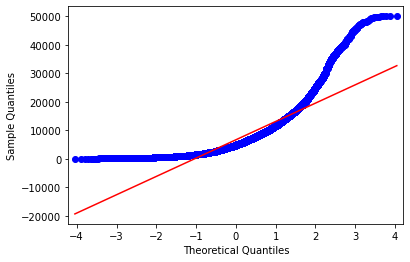

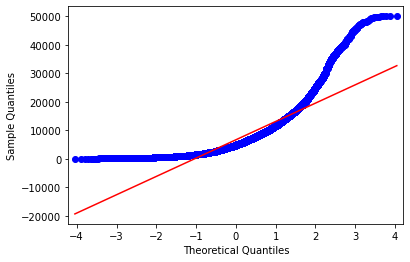

In [10]:
qqplot(cars.price_usd, line='s')

<AxesSubplot:xlabel='count', ylabel='location_region'>

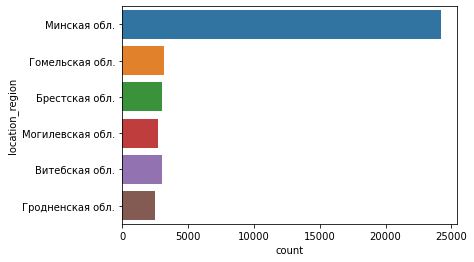

In [11]:
sns.countplot(y=cars['location_region'])

In [12]:
cars.groupby('location_region').agg({'price_usd': ['count', 'mean', 'median']})

price_usd                     
                     count         mean  median
location_region                                
Брестская обл.        2991  5088.939010  3850.0
Витебская обл.        3007  4869.609864  3700.0
Гомельская обл.       3140  5021.680121  3600.0
Гродненская обл.      2485  4744.867859  3600.0
Минская обл.         24230  7678.210612  5700.0
Могилевская обл.      2678  4622.357972  3200.0

In [13]:
cars.state.value_counts()

owned        37723
new            438
emergency      370
Name: state, dtype: int64

<AxesSubplot:xlabel='count', ylabel='color'>

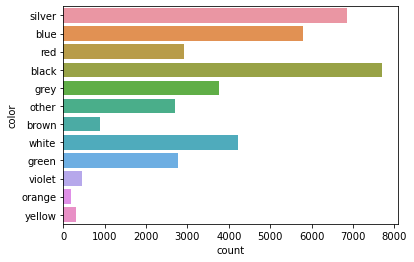

In [14]:
sns.countplot(y=cars['color'])

In [16]:
cars['manufacturer_name'].value_counts()

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


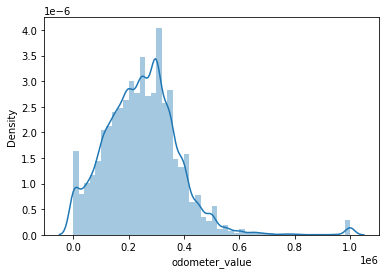

In [17]:
sns.distplot(cars['odometer_value'])
plt.show()

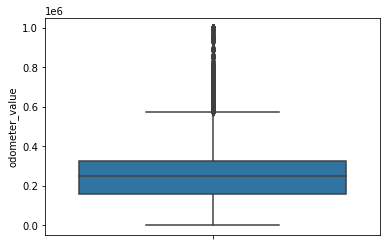

In [18]:
sns.boxplot(y=cars['odometer_value'])
plt.show()

In [19]:
cars[cars['odometer_value'] < 10].shape

(487, 30)

In [20]:
cars[cars['odometer_value'] > 600000]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
240,Subaru,Legacy,automatic,grey,999999,1991,gasoline,False,gasoline,2.2,...,False,False,False,False,False,False,False,False,False,62
564,Dodge,Caravan,automatic,black,1000000,1996,gas,True,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,167
634,Dodge,Caravan,automatic,green,623123,1998,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,False,38
640,Dodge,Stratus,automatic,silver,1000000,2004,gasoline,False,gasoline,2.4,...,True,False,True,False,False,False,False,False,True,21
974,Kia,Shuma,mechanical,red,1000000,1998,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,False,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37616,Peugeot,406,mechanical,grey,800000,1998,diesel,False,diesel,2.1,...,True,False,False,False,False,False,False,False,False,57
37770,Peugeot,Boxer,mechanical,white,777777,1995,diesel,False,diesel,2.5,...,False,False,False,False,False,False,False,False,False,64
38073,Peugeot,308,automatic,silver,1000000,2008,gasoline,False,gasoline,1.6,...,True,False,True,False,True,False,True,True,True,165
38120,Peugeot,Boxer,mechanical,orange,1000000,1997,diesel,False,diesel,2.5,...,False,False,False,False,False,False,False,False,False,100


In [21]:
cars_clean = cars[(cars['odometer_value'] > 10) & (cars['odometer_value'] < 600000) & (cars['price_usd'] > 135)]

<AxesSubplot:>

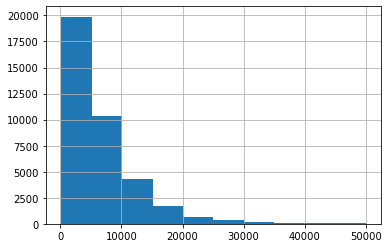

In [22]:
cars_clean['price_usd'].hist()

<AxesSubplot:>

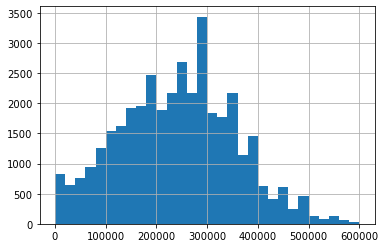

In [23]:
cars_clean['odometer_value'].hist(bins=30)

Был сформирован датасет *cars_clean* отталкиваясь от следующего:
- так как у нас заявлен датасет б/у автомобилей - рассматриваю только подержанные авто;
- ввела ограничения пробега. Цифра менее 10 км мне не внушает доверия, по причине того, что на обкатку уходит как минимум 7 - 15 км, а так же предполагаю что мало кого будут интересовать автомобилями с цифрой на одометре > 600000 км (думаю таких будут единицы);
- также были интересные цены на представленные машины в 1 USD, поставила ограничение в 135 USD, ссылаясь на то что гражданам России после приобретения автомобиля необходимо выплатить подоходный налог - минимальная цена это 10 тыс.р. В Белоруссии подоходного налога нет, только [при условии продажи от двух авто в год](http://www.nalog.gov.by/ru/podoxodnyi-nalog-ru/page/3/), поэтому может такие минимальные цены и оправданы.

В целом сформировала датасет для целевой аудитории, те автомобили, которые могут заинтересовать среднестатистического покупателя.

In [24]:
cars_clean.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [25]:
var = ['transmission', 'color', 'odometer_value', 'year_produced', 'engine_fuel', 
       'engine_type', 'engine_capacity', 'body_type', 'state', 'price_usd', 'location_region']

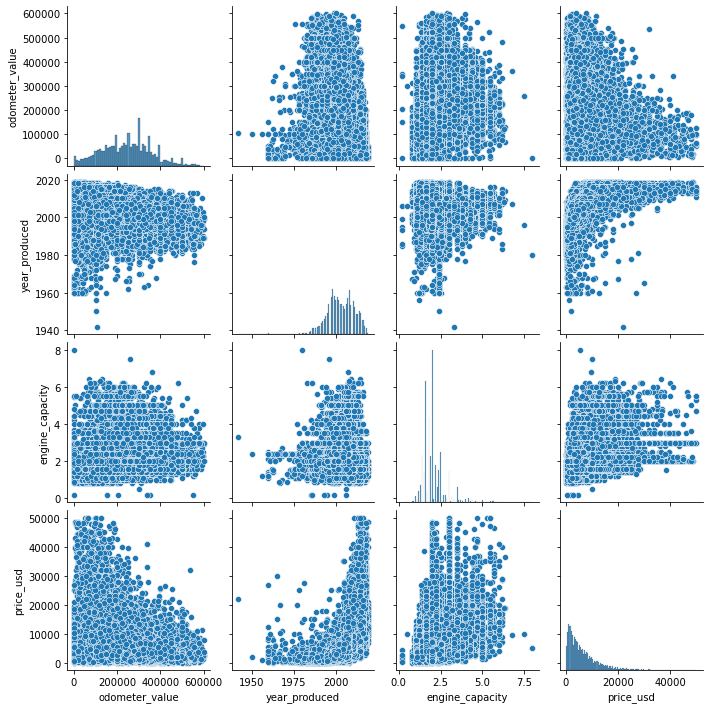

In [26]:
sns.pairplot(cars_clean[var])
plt.show()

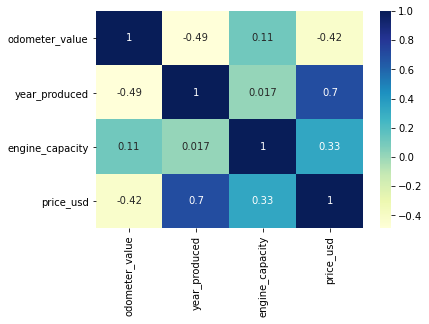

In [27]:
sns.heatmap(cars_clean[var].corr(), annot=True, cmap='YlGnBu')
plt.show()

### Критерий Хи-квадрат

In [30]:
table = stats.Table.from_data(cars_clean[['transmission', 'location_region']])

In [31]:
table.table_orig

location_region,Брестская обл.,Витебская обл.,Гомельская обл.,Гродненская обл.,Минская обл.,Могилевская обл.
transmission,,,,,,
automatic,770,734,853,538,9008,655
mechanical,2157,2224,2237,1885,14467,1965


In [32]:
table.fittedvalues

location_region,Брестская обл.,Витебская обл.,Гомельская обл.,Гродненская обл.,Минская обл.,Могилевская обл.
transmission,,,,,,
automatic,980.376764,990.759982,1034.972395,811.565732,7862.775718,877.549409
mechanical,1946.623236,1967.240018,2055.027605,1611.434268,15612.224282,1742.450591


In [33]:
print(table.test_nominal_association()) #отвергаю нулевую гипотезу

df          5
pvalue      0.0
statistic   690.3721686880998


In [34]:
table.chi2_contribs

location_region,Брестская обл.,Витебская обл.,Гомельская обл.,Гродненская обл.,Минская обл.,Могилевская обл.
transmission,,,,,,
automatic,45.144259,66.540524,31.995010,92.214601,166.803519,56.439260
mechanical,22.735978,33.511767,16.113629,46.441987,84.007162,28.424473


In [35]:
chi_2 = table.test_nominal_association().statistic

(chi_2 / len(cars_clean)) ** 0.5  #слабая взаимосвязь

0.13569584245360053

In [36]:
contribs = table.chi2_contribs.reset_index()
variable = contribs.melt(id_vars='transmission',
                         value_vars=['Брестская обл.', 'Витебская обл.', 'Гомельская обл.',
                         'Гродненская обл.', 'Минская обл.', 'Могилевская обл.'])

<AxesSubplot:xlabel='value', ylabel='location_region'>

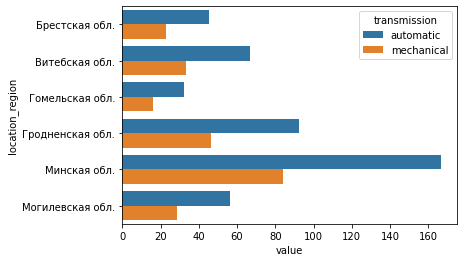

In [37]:
sns.barplot(y='location_region', x='value', hue='transmission', data=variable) #в областях прослеживается тенденция к механике, чем к автомату

### Т-тест

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


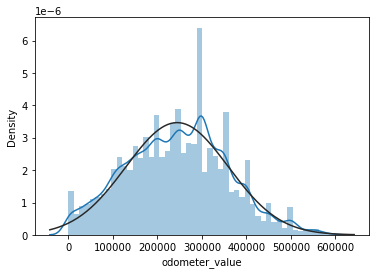

In [38]:
sns.distplot(cars_clean.odometer_value, fit=scipy.stats.norm)
plt.show()

In [39]:
cars_clean.groupby('state')['odometer_value'].describe() #выберу уровень значимости 0.001

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
emergency,343.0,247444.897959,133903.858203,25.0,150000.0,270000.0,345839.5,555555.0
owned,37150.0,244160.718762,114865.705293,11.0,160000.0,250000.0,320000.0,599999.0


In [40]:
cars_clean[cars_clean['state'] == 'emergency']['odometer_value'].var()

17930243241.559727

In [41]:
cars_clean[cars_clean['state'] == 'owned']['odometer_value'].var()

13194130252.496

*F-тест* на равенство дисперсий

In [42]:
cars_clean[cars_clean['state'] == 'emergency']['odometer_value'].var() / cars_clean[cars_clean['state'] == 'owned']['odometer_value'].var() #дисперсии не равны

1.35895605837056

In [43]:
ttest_ind(cars_clean[cars_clean['state'] == 'emergency']['odometer_value'],
         cars_clean[cars_clean['state'] == 'owned']['odometer_value'], equal_var=False) #не отклоняю нулевую гипотезу - среднии значения одометра равны 

Ttest_indResult(statistic=0.4526999966234426, pvalue=0.6510479601484778)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


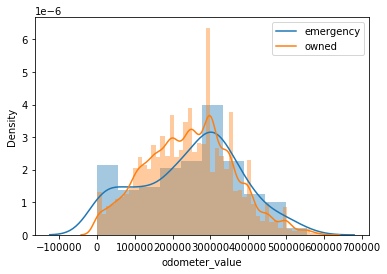

In [44]:
sns.distplot(cars_clean[cars_clean['state'] == 'emergency']['odometer_value'])
sns.distplot(cars_clean[cars_clean['state'] == 'owned']['odometer_value'])
plt.legend(['emergency', 'owned'])
plt.show()

In [45]:
cars_clean.groupby('state')['odometer_value'].mean()

state
emergency    247444.897959
owned        244160.718762
Name: odometer_value, dtype: float64

In [46]:
247444.897959 / 244160.718762

1.013450890928124

In [47]:
#так как были недостающие значения в категории engine_capasity
cars_clean['engine_capacity'].isnull().value_counts()

False    37483
True        10
Name: engine_capacity, dtype: int64

In [48]:
cars_clean_e = cars_clean.dropna(axis=0, how='any')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


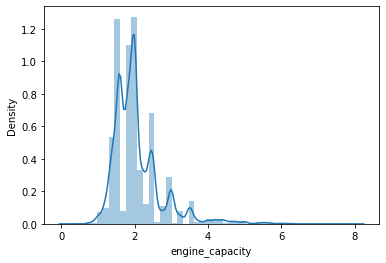

In [49]:
sns.distplot(cars_clean_e['engine_capacity'])
plt.show()

In [50]:
cars_clean_e['engine_capacity_gr'] = pd.cut(cars_clean_e['engine_capacity'],
                                           bins=[0, 1.5, 3.5, 8],
                                           labels=['small', 'medium', 'large']) #разобью на мало-, средне- и крупнолитражные

<ipython-input-50-4fc26a24a002>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_clean_e['engine_capacity_gr'] = pd.cut(cars_clean_e['engine_capacity'],


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_capacity_gr', ylabel='count'>

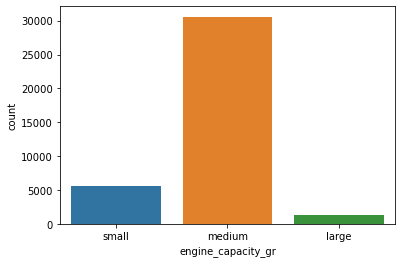

In [51]:
sns.countplot(cars_clean_e['engine_capacity_gr'])

### ANOVA

In [52]:
f_oneway(cars_clean_e[cars_clean_e['engine_capacity_gr'] == 'small']['odometer_value'],
         cars_clean_e[cars_clean_e['engine_capacity_gr'] == 'medium']['odometer_value'],
         cars_clean_e[cars_clean_e['engine_capacity_gr'] == 'large']['odometer_value']) #отклоняю нулевую гипотезу, пробег разный в зависисмости от обьема двигателя

F_onewayResult(statistic=853.2003012267871, pvalue=0.0)

In [53]:
cars_clean_e.groupby('engine_capacity_gr')['odometer_value'].mean()

engine_capacity_gr
small     188503.602164
medium    255237.833382
large     226836.718553
Name: odometer_value, dtype: float64

In [54]:
m_comp = pairwise_tukeyhsd(endog=cars_clean_e['odometer_value'],    #среденее Тьюки
                          groups=cars_clean_e['engine_capacity_gr'],
                          alpha=0.001)

In [55]:
print(m_comp)

     Multiple Comparison of Means - Tukey HSD, FWER=0.00      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
 large medium  28401.1148 0.001  16873.2707  39928.9589   True
 large  small -38333.1164 0.001  -50837.808 -25828.4248   True
medium  small -66734.2312 0.001 -72573.1004  -60895.362   True
--------------------------------------------------------------


In [56]:
#в зависимости от коробки передач
f_oneway(cars_clean_e[(cars_clean_e.engine_capacity_gr == 'small') & (cars_clean_e.transmission == 'automatic')]['odometer_value'],
         cars_clean_e[(cars_clean_e.engine_capacity_gr == 'medium') & (cars_clean_e.transmission == 'automatic')]['odometer_value'],
         cars_clean_e[(cars_clean_e.engine_capacity_gr == 'large') & (cars_clean_e.transmission == 'automatic')]['odometer_value']) #отвергаю H0

F_onewayResult(statistic=343.23752188810306, pvalue=7.403326387183718e-146)

In [57]:
f_oneway(cars_clean_e[(cars_clean_e.engine_capacity_gr == 'small') & (cars_clean_e.transmission == 'mechanical')]['odometer_value'],
         cars_clean_e[(cars_clean_e.engine_capacity_gr == 'medium') & (cars_clean_e.transmission == 'mechanical')]['odometer_value'],
         cars_clean_e[(cars_clean_e.engine_capacity_gr == 'large') & (cars_clean_e.transmission == 'mechanical')]['odometer_value']) #отвергаю H0

F_onewayResult(statistic=844.4442406069724, pvalue=0.0)

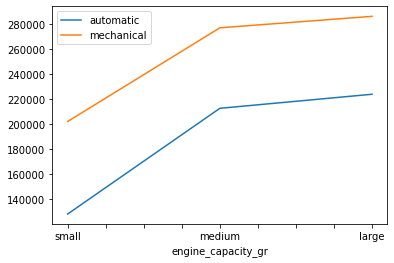

In [58]:
cars_clean_e[cars_clean_e.transmission == 'automatic'].groupby('engine_capacity_gr')['odometer_value'].mean().plot()
cars_clean_e[cars_clean_e.transmission == 'mechanical'].groupby('engine_capacity_gr')['odometer_value'].mean().plot()
plt.legend(['automatic', 'mechanical'])
plt.show() #исходя из графика трансмиссия не влияет на километраж в зависимости от объема

In [59]:
model = ols('odometer_value ~ C(engine_capacity_gr) + C(transmission) + C(engine_capacity_gr):C(transmission)',
           data=cars_clean_e).fit()

In [60]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(engine_capacity_gr),2.813239e+13,2.0,1194.817930,0.000000
C(transmission),3.310848e+13,1.0,2812.317516,0.000000
C(engine_capacity_gr):C(transmission),6.990155e+10,2.0,2.968806,0.051377
Residual,4.412043e+14,37477.0,NaN,NaN


### Метод U-критерий Манна-Уитни

In [61]:
cars_clean['state'].value_counts()

owned        37150
emergency      343
Name: state, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


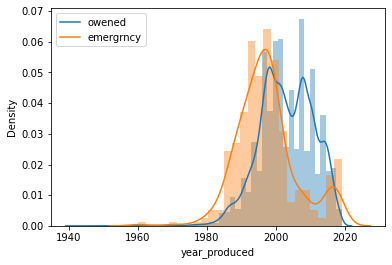

In [62]:
sns.distplot(cars_clean[cars_clean['state'] == 'owned']['year_produced'])
sns.distplot(cars_clean[cars_clean['state'] == 'emergency']['year_produced'])
plt.legend(['owened', 'emergrncy'])
plt.show()

In [63]:
cars_clean.groupby('state')['year_produced'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
emergency,343.0,1997.317784,8.817905,1960.0,1992.0,1997.0,2000.0,2019.0
owned,37150.0,2002.928721,7.851044,1942.0,1998.0,2003.0,2009.0,2019.0


In [64]:
mannwhitneyu(cars_clean[cars_clean['state'] == 'owned']['year_produced'],
            cars_clean[cars_clean['state'] == 'emergency']['year_produced'])

MannwhitneyuResult(statistic=3759476.0, pvalue=1.6561846748719707e-39)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


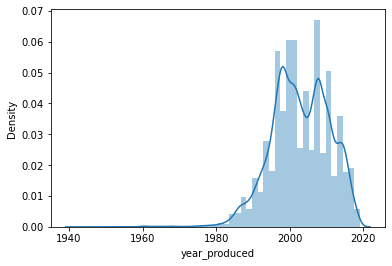

In [65]:
sns.distplot(cars_clean['year_produced'])
plt.show()

In [66]:
cars_clean['year_produced'].min(), cars_clean['year_produced'].max()

(1942, 2019)

In [67]:
cars_clean['year_produced_gr'] = pd.cut(cars_clean['year_produced'],
                                       bins=[1942, 1980, 1995, 2005, 2010, 2019],
                                       labels=['1942_1980', '1980_1995', '1995_2005', '2005_2010', '2010_2019'])

<ipython-input-67-bada5d01c313>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_clean['year_produced_gr'] = pd.cut(cars_clean['year_produced'],


In [68]:
cars_clean.groupby('year_produced_gr')['price_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
year_produced_gr,,,,,,,,
1942_1980,196.0,3034.499745,4495.738152,145.12,641.63,1299.5,3364.805,30000.0
1980_1995,5724.0,1546.886574,1403.160324,142.27,700.00,1200.0,1990.460,27514.7
1995_2005,16473.0,3798.685499,2465.639251,150.00,2000.00,3400.0,5000.000,35000.0
2005_2010,8314.0,8777.176733,4289.885159,150.00,5950.00,7874.5,10500.000,41000.0
2010_2019,6785.0,14418.513749,7492.905990,1050.00,9400.00,12500.0,17000.000,50000.0


In [69]:
l = cars_clean.year_produced_gr.unique()
list_ = []

for i in l:
    list_.append(list(cars_clean[cars_clean.year_produced_gr == i]['price_usd']))

### Критерий Краскела-Уоллиса

In [70]:
kruskal(list_[0], list_[1],
       list_[2], list_[3], list_[4]) #разные цены в зависимости от года выпуска

KruskalResult(statistic=24435.824014654423, pvalue=0.0)

### Регрессия

In [71]:
cars_clean['price_usd_'] = cars_clean['price_usd'] ** 0.5

<ipython-input-71-10d99d749cd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_clean['price_usd_'] = cars_clean['price_usd'] ** 0.5


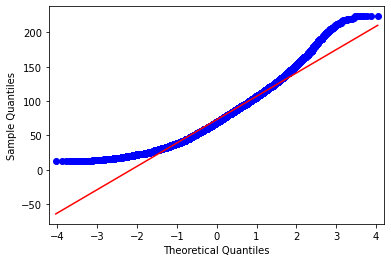

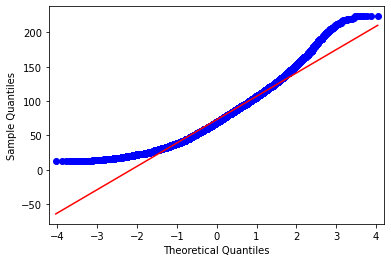

In [72]:
qqplot(cars_clean['price_usd_'], line='s')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_usd_', ylabel='Density'>

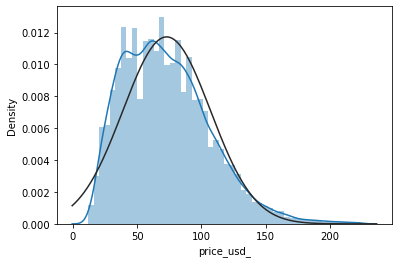

In [73]:
sns.distplot(cars_clean.price_usd_, fit=scipy.stats.norm)

In [74]:
cars_clean.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed', 'year_produced_gr',
       'price_usd_'],
      dtype='object')

In [75]:
var_car = ['transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region', 'price_usd_']

In [76]:
cars_clean[var_car].corr()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,price_usd_
odometer_value,1.000000,-0.488809,0.063750,0.111648,-0.067660,-0.423101,0.071857,-0.425054
year_produced,-0.488809,1.000000,-0.073193,0.016571,0.073538,0.698262,-0.085433,0.789371
engine_has_gas,0.063750,-0.073193,1.000000,0.085374,-0.008498,-0.060516,0.021667,-0.063199
engine_capacity,0.111648,0.016571,0.085374,1.000000,-0.011263,0.333583,0.091481,0.334474
has_warranty,-0.067660,0.073538,-0.008498,-0.011263,1.000000,0.080981,-0.012113,0.071053
price_usd,-0.423101,0.698262,-0.060516,0.333583,0.080981,1.000000,-0.037896,0.961443
is_exchangeable,0.071857,-0.085433,0.021667,0.091481,-0.012113,-0.037896,1.000000,-0.050344
price_usd_,-0.425054,0.789371,-0.063199,0.334474,0.071053,0.961443,-0.050344,1.000000


In [77]:
reg = 'price_usd_ ~ odometer_value + year_produced + engine_capacity + transmission + color + state + location_region + body_type'

In [78]:
model_reg = ols(reg, data=cars_clean).fit()

In [79]:
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price_usd_   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     4076.
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:54:08   Log-Likelihood:            -1.5725e+05
No. Observations:               37483   AIC:                         3.146e+05
Df Residuals:                   37450   BIC:                         3.148e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -5525.0979     27.944   -197.722      0.000   -5579.869   -5470.327
transmission[T.mechanical]             -6.5735      0.225    -29.159      0.000      -7.015      -6.132
color[T.blue]                          -4.6136      0.294    -15.691      0.000      -5.190      -4.037
color[T.brown]                          2.4321      0.595      4.090      0.000       1.267       3.598
color[T.green]                         -6.7833      0.376    -18.034      0.000      -7.521      -6.046
color[T.grey]                          -1.5676      0.325     -4.822      0.000      -2.205      -0.930
color[T.orange]                        -3.1914      1.251     -2.551      0.011      -5.644      -0.739
color[T.other]                         -4.7296      0.369    -12.807      0.000      -5.453      -4.006
color[T.red]                           -4.8452      0.368    -13.176      0.000      -5.566      -4.124
color[T.silver]                        -5.0960      0.274    -18.580      0.000      -5.634      -4.558
color[T.violet]                        -6.4462      0.781     -8.258      0.000      -7.976      -4.916
color[T.white]                         -1.3184      0.329     -4.010      0.000      -1.963      -0.674
color[T.yellow]                        -3.5060      0.983     -3.566      0.000      -5.433      -1.579
state[T.owned]                         18.4990      0.874     21.155      0.000      16.785      20.213
location_region[T.Витебская обл.]      -2.1467      0.419     -5.120      0.000      -2.969      -1.325
location_region[T.Гомельская обл.]     -0.4928      0.415     -1.188      0.235      -1.306       0.320
location_region[T.Гродненская обл.]    -0.3052      0.442     -0.691      0.490      -1.171       0.560
location_region[T.Минская обл.]         1.0732      0.318      3.375      0.001       0.450       1.696
location_region[T.Могилевская обл.]    -1.7700      0.433     -4.090      0.000      -2.618      -0.922
body_type[T.coupe]                    -10.6147      1.997     -5.314      0.000     -14.530      -6.700
body_type[T.hatchback]                -22.6006      1.909    -11.838      0.000     -26.343     -18.859
body_type[T.liftback]                 -16.1991      2.020     -8.020      0.000     -20.158     -12.240
body_type[T.limousine]                -24.2727      5.214     -4.655      0.000     -34.492     -14.053
body_type[T.minibus]                    2.2769      1.955      1.164      0.244      -1.556       6.109
body_type[T.minivan]                  -14.3099      1.919     -7.457      0.000     -18.071     -10.548
body_type[T.pickup]                    -1.4426      2.378     -0.607      0.544      -6.103       3.217
body_type[T.sedan]                    -17.4278      1.903     -9.16

<AxesSubplot:>

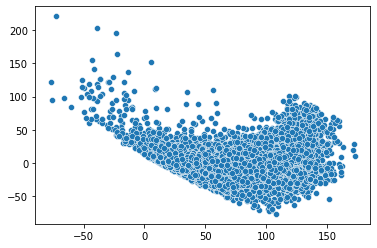

In [80]:
sns.scatterplot(x=model_reg.fittedvalues, y=model_reg.resid)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

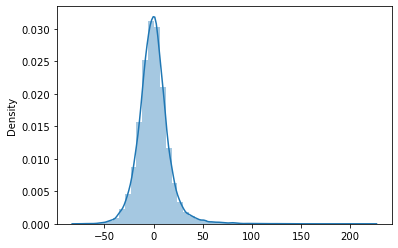

In [81]:
sns.distplot(model_reg.resid)

<AxesSubplot:xlabel='year_produced', ylabel='price_usd_'>

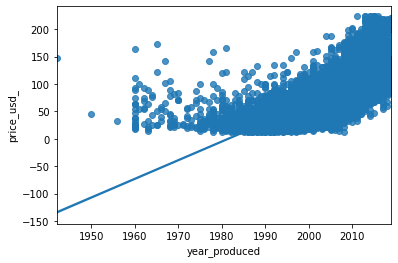

In [82]:
sns.regplot(x='year_produced', y='price_usd_', data=cars_clean)

Из полученной модели видно, что статзначимы как год выпуска автомобиля, состояние одометра в км, объем двигателя, состояние, а также остальные характеристики, исключения присутствуют в категориях (сравнение относительно автоматически выбранной категории), но их не так много. В целом модель показала, что почти все признаки влияют на цену атомобиля.